Arden Chaing

Phys 434

October 13th 2020

Lab 2

In [31]:
# necessary imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special
from scipy.stats import poisson

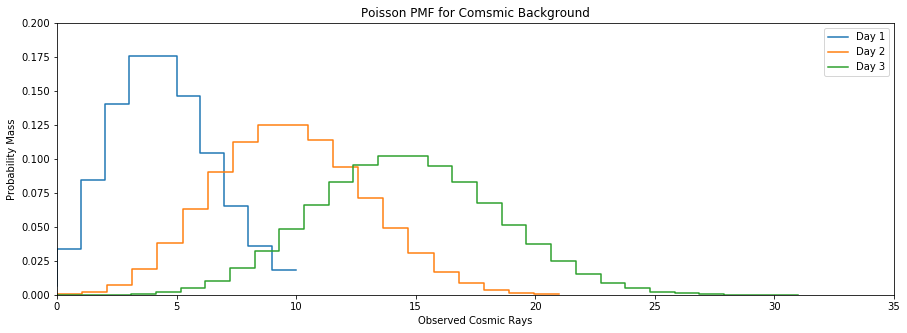

In [32]:
# 1.A
x0 = np.linspace(0, 10, 11)
dist = stats.poisson.pmf(x0, 5)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, dist)
x2 = np.linspace(0, len(conv2), len(conv2))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.step(x0, dist, label='Day 1')
ax.step(x1, conv1, label='Day 2')
ax.step(x2, conv2, label='Day 3')

ax.set_xlim(0, 35)
ax.set_ylim(0, 0.2)

plt.title("Poisson PMF for Comsmic Background")
plt.xlabel("Observed Cosmic Rays")
plt.ylabel('Probability Mass')
ax.legend(loc='best')

plt.show()

Problem 1.A: Displayed in the graph above, the probablity disbutribution of the background spreads outwards/expands as the days increase - more and more convolutions. In addition, the mean of the observed cosmic rays increases while it's probablity decreases. 

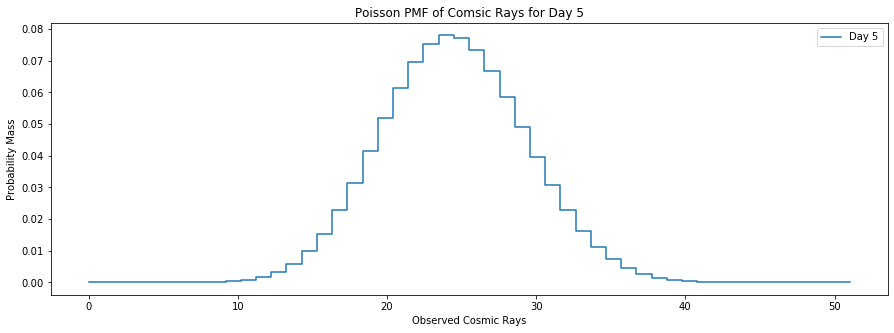

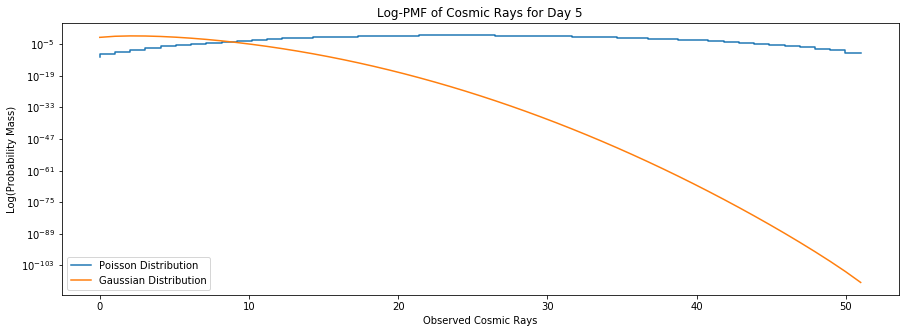

In [33]:
# 1.B
conv3 = np.convolve(conv2, dist)
conv4 = np.convolve(conv3, dist)
x4 = np.linspace(0, len(conv4), len(conv4))

x = np.linspace(0, 10, 11)
norm = stats.norm.pdf(x)
conv5 = np.convolve(norm, norm)
conv6 = np.convolve(conv5, norm)
conv7 = np.convolve(conv6, norm)
conv8 = np.convolve(conv7, norm)
x8 = np.linspace(0, len(conv8), num=len(conv8))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.step(x4, conv4, label='Day 5')
plt.title('Poisson PMF of Comsic Rays for Day 5')
plt.xlabel("Observed Cosmic Rays")
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.step(x4, conv4, label='Poisson Distribution')
plt.plot(x8, conv8, label='Gaussian Distribution')
plt.title('Log-PMF of Cosmic Rays for Day 5')
plt.xlabel("Observed Cosmic Rays")
plt.ylabel('Log(Probability Mass)')
plt.legend(loc='best')
plt.semilogy()
plt.show()

Problem 1.B: Intially when we look at the probability distribution of the data that's summed up over 5 days, it looks like a normal distribution. However, when plotting that on a log scale with a gaussian distribution it becomes clear that it's still a poisson distribution. Conceptually this makes sense since we are convoling a poisson distribution - which describes the independent probablity of discrete events occuring over some time interval. Thus adding five independent variables together, we should expect the mean value to be 5 times larger and the shape to still be poisson-like. Also mathematically we can confirms this because the convolution of multiple poisson distribution results into the poisson distribution with a mean equal to the sum of the lambdas of the distributions being convolved.

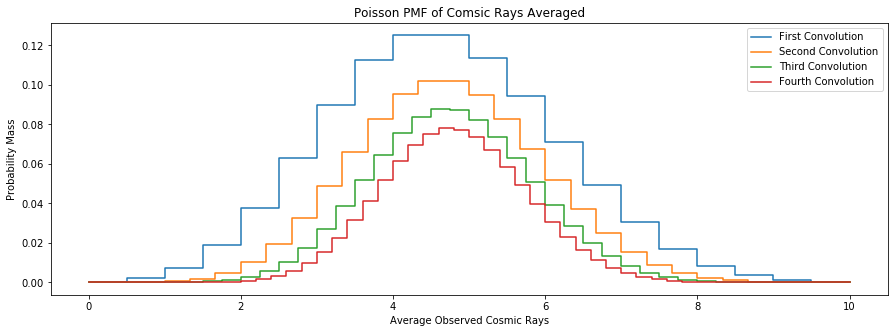

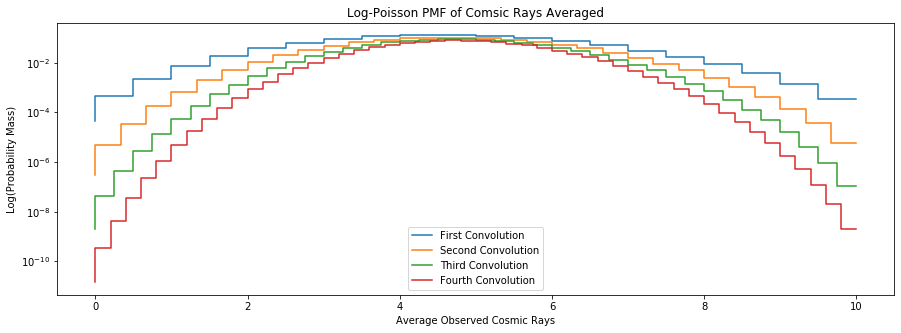

In [34]:
# 1.C
x1 = np.linspace(0, 10, len(conv1))
x2 = np.linspace(0, 10, len(conv2))
x3 = np.linspace(0, 10, len(conv3))
x4 = np.linspace(0, 10, len(conv4))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.step(x1, conv1, label='First Convolution')
plt.step(x2, conv2, label='Second Convolution')
plt.step(x3, conv3, label='Third Convolution')
plt.step(x4, conv4, label='Fourth Convolution')
plt.title('Poisson PMF of Comsic Rays Averaged')
plt.xlabel("Average Observed Cosmic Rays")
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

plt.step(x1, conv1, label='First Convolution')
plt.step(x2, conv2, label='Second Convolution')
plt.step(x3, conv3, label='Third Convolution')
plt.step(x4, conv4, label='Fourth Convolution')
plt.title('Log-Poisson PMF of Comsic Rays Averaged')
plt.xlabel("Average Observed Cosmic Rays")
plt.ylabel('Log(Probability Mass)')
plt.legend(loc='best')
plt.semilogy()
plt.show()

Problem 1.C: Constantly averaging a convolution could be difficult, therefore in order to achieve the same effect I rescaled the x-axis in order to normalize all four functions. Above one can observe that as one averages more and more days, the probablity distribution constricts symmetrically around the unchanging mean. In the log-scale graph as we continue to convolve the functions move to look like a downward parabolic shape which is a characteristic of a normal distribution. This makes sense because the central limit theorem states that "the sampling distribution of the smaple means approaches a normal distribution as the sample gets larger." 

In [35]:
# 1.D
conv5 = np.convolve(conv4, dist)
events = (6*4.5)
cdf = 0
for i in range(int(events + 1)):
    cdf += conv5[i]
print(np.abs(stats.norm.ppf(1-cdf)))

0.4387453140726661


Problem 1.D: Choosing six days, with a the average of the gamma-rays emitted being 4.5, there would've been 36 events seen. In order to get the six days I had to convolve the distribution one more time from before. Then we integrate from zero to 36 in order to get the probability that the background gives us a signal less than our measured value. After that we subtract that value from one to get the probablity that the background gives us a signal that is just like or more signal like than the measured value. The sigma value is 0.44.

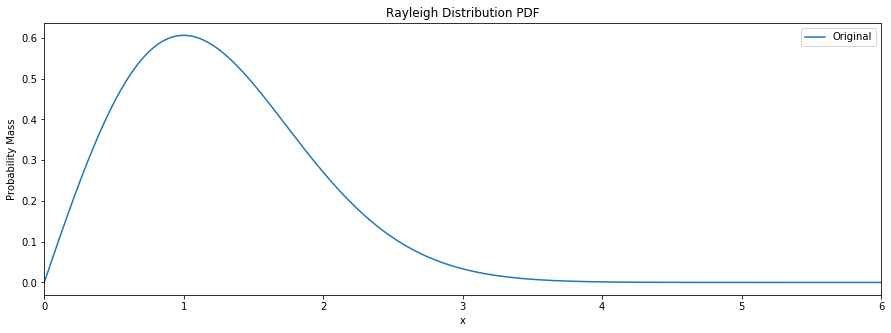

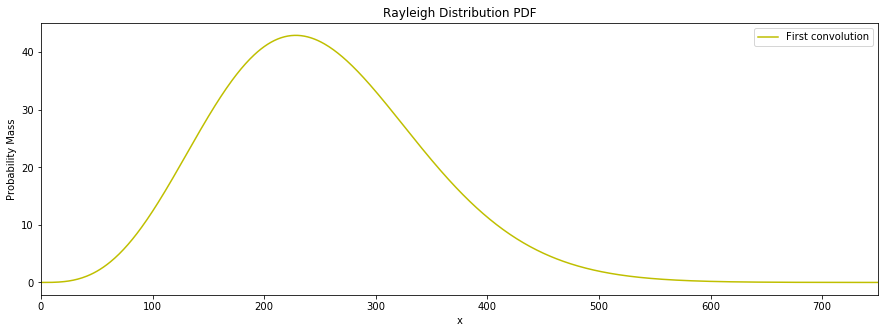

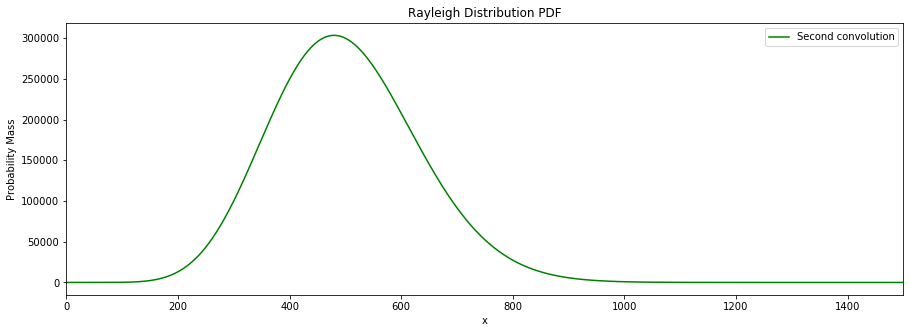

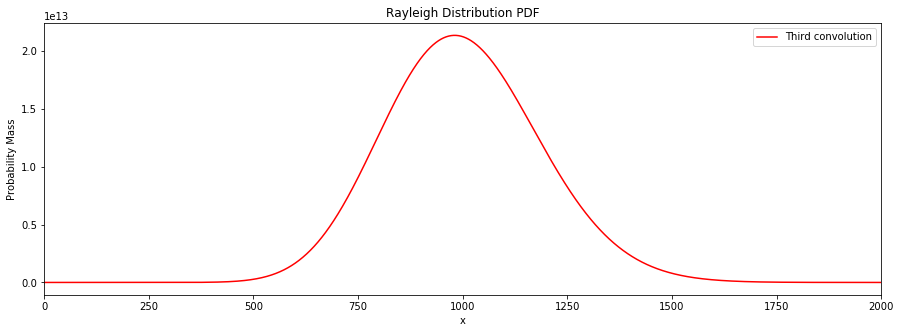

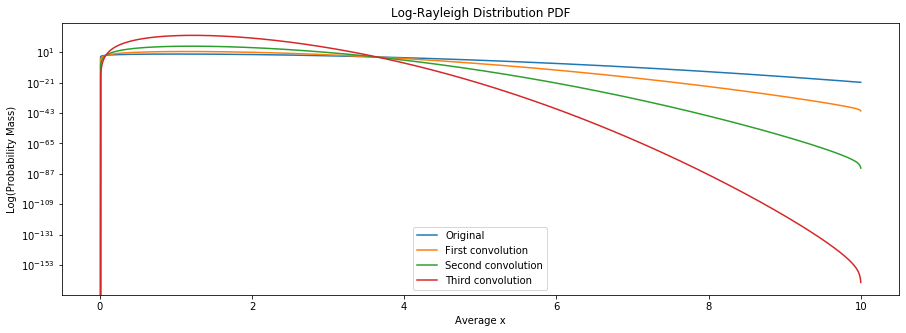

In [36]:
# 2.A: 
x = np.linspace(0, 10, 1000)
dist = stats.rayleigh.pdf(x)

conv1 = np.convolve(dist, dist)
x1 = np.linspace(0, len(conv1), len(conv1))

conv2 = np.convolve(conv1, conv1)
x2 = np.linspace(0, len(conv2), len(conv2))

conv3 = np.convolve(conv2, conv2)
x3 = np.linspace(0, len(conv3), len(conv3))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x, dist, label='Original')
plt.xlim(0, 6)
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x1, conv1, label='First convolution', color='y')
plt.xlim(0, 750)
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x2, conv2, label='Second convolution', color='g')
plt.xlim(0, 1500)
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Rayleigh Distribution PDF")
plt.plot(x3, conv3, label='Third convolution', color='r')
plt.xlim(0, 2000)
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.legend(loc='best')
plt.show()

x1n = np.linspace(0, 10, len(conv1))
x2n = np.linspace(0, 10, len(conv2))
x3n = np.linspace(0, 10, len(conv3))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Log-Rayleigh Distribution PDF")
plt.plot(x, dist, label='Original')
plt.plot(x1n, conv1, label='First convolution')
plt.plot(x2n, conv2, label='Second convolution')
plt.plot(x3n, conv3, label='Third convolution')
plt.yscale('log')
plt.xlabel('Average x')
plt.ylabel('Log(Probability Mass)')
plt.legend(loc='best')
plt.show()

Problem 2.A-B: Let's chose a rayleigh distrubution with sigma value = 1. We can see that as we average more observing intervals, the shape shifts to the right and gets taller and narrower. You can see the "rayleigh rail" getting less and less prominant. Looking at the log graphs, we can see that as we average more and more events, the distribution trends towards a downward parabola - which is a property of a normal distribution. Based on the eye-ball test it looks gaussian by the third convolution but looking at the associated log scale graph it's not quite there yet. Looking at the log-scale at 100 intervals (below) it's beginning to look a lot like a parabola, however the program produces errors for larger values. Thus after 100+ intervals it's begins to look like a normal distribution. 

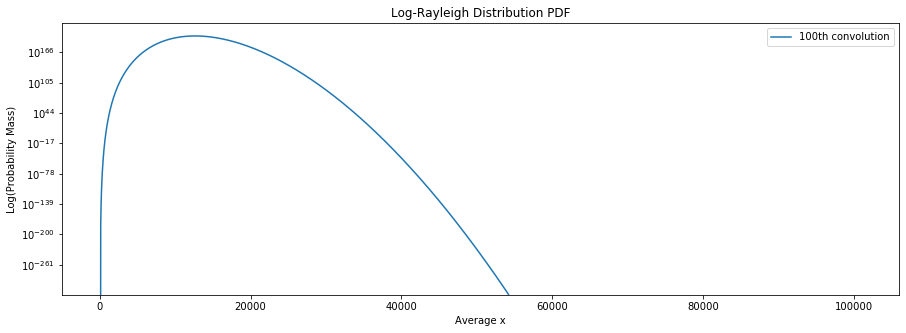

In [37]:
# 2.B: 
avg_probs = np.copy(dist)
for i in range(100):
    avg_probs = np.convolve(dist, avg_probs)
x100 = np.linspace(0, len(avg_probs), len(avg_probs))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Log-Rayleigh Distribution PDF")
plt.plot(x100, avg_probs, label='100th convolution')
plt.xlabel('Average x')
plt.ylabel('Log(Probability Mass)')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

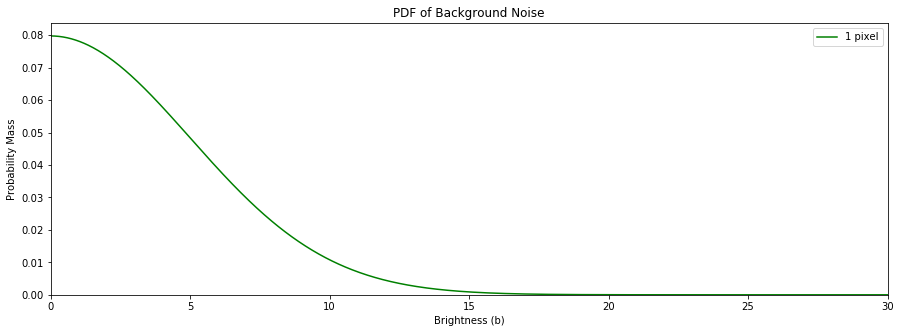

6.009127639927669e-10
6.079999993103955


In [38]:
# 3.A:
dist = stats.norm(scale=5)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
x = np.linspace(0, 30, 1000)
plt.title("PDF of Background Noise")
plt.xlabel("Brightness (b)")
plt.ylabel("Probability Mass")
plt.plot(x, dist.pdf(x), label='1 pixel', color='g')
plt.xlim(0, 30)
plt.ylim(0, None);
plt.legend(loc='best')
plt.show()

width = 5
brightness = 30.4
prob = 1 - stats.norm.cdf(brightness, loc=0, scale=width)
ppf = np.abs(stats.norm.ppf(prob))
print(prob)
print(ppf)

Problem 3.A: Using a width of 5 on our background gaussian distribution and a signal strength of 30.4, one can calculate the significance of this detection, which is 6.1 sigma. Also one can discover that there's a probablity of 6.01e-10 that the background will give them a signal that's equally or more bright than the measured signal strength. Since the significance is larger than the 5 sigma standard, we can claim a discovery.

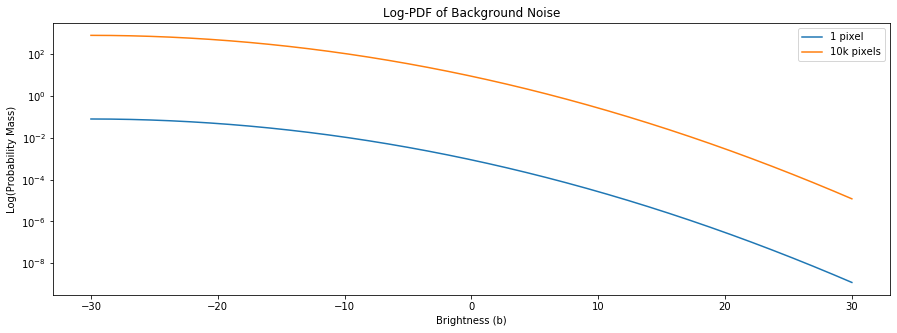

In [39]:
# 3.B: 
pdf = stats.norm.pdf(x, loc=0, scale=5)
scaled_pdf = pdf * 10000

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
x = np.linspace(-30, 30, 1000)
plt.title("Log-PDF of Background Noise")
plt.xlabel("Brightness (b)")
plt.ylabel("Log(Probability Mass)")
plt.plot(x, pdf, label='1 pixel')
plt.plot(x, scaled_pdf, label='10k pixels')
plt.semilogy()
plt.legend(loc='best')
plt.show()

Problem 3.B: To perform the same analysis without knowing the location data, we must combine the background distribution of all 10k pixels. We can do this eaither by convolving the distribution 10k times or by multiplying the background distribution for one pixel by 10k. I chose the latter. Above we can see the distributions before and after scaling. Using the same brightness signal where b equals 30.4, we can find the signficance of our measurement. However, with this new information we must phrase the question different as "what's the probability that the overall 10k pixel background data produces a measurement that's as signal-like or more signal like than 30.4?

In [40]:
# 3.C: 
scaled_prob = prob * 10000
scaled_ppf = np.abs(stats.norm.ppf(scaled_prob))
print("Probability = " + str(scaled_prob))
print("Sigma = " + str(scaled_ppf))

Probability = 6.009127639927669e-06
Sigma = 4.377256421339723


Problem 3C: Scaling the probablity from part a by 10k will yield the probability of the background giving us a signal that was equally or more bright than the mesaured value over all 10k pixels. However, now the significance is less than 5 sigma, thus we can no longer reject the null hypothesis. 

In [41]:
# 4.A: 
val = 5
prob = 1- stats.norm.cdf(val)
signal = np.abs(dist.ppf(prob))
print("Probability = " + str(prob))
print("Signal = " + str(signal))

Probability = 2.866515719235352e-07
Signal = 24.99999999985088


Problem 4.A: We are trying to figure out what is the signal required for a 5 sigma detection, using the same parameters as version 1 - one pixel. We can figure out what the probablity at 5 sigma then utilize the ppf function from the background distribution. So for our parameters, if the sigal is 25 or greater, we will have a successful 5 sigma signal detection.

In [42]:
# 4.B: 
prob_2 = prob / 10000
signal_2 = dist.ppf(1 - prob_2)
print("Probability = " + str(prob_2))
print("signal = " + str(signal_2))

Probability = 2.866515719235352e-11
signal = 32.752687434458274


Problem 4.B: Same as the previous problem, we were abel to calculate the signal required for a 5 sigma detection. We can scale down the probablity by 10k since we had 10k pixels, then the rest is pretty standard to discover the signal value. So for our parameters, if the signal is 32.75 or greater, we will have a successful 5 sigma signal detection. 

In [52]:
# 4.C:
print(signal_2/signal)

2.292266405084815


Problem 4.C: In a trial with 10k pixels, the signal only needs to be 31% brighter than a trial with only 1 pixel in order to be considered a discovery. An increase from 25 to 32.75. This seems awfully low however, there is a large decrease in probablity of seeing a signal at or above the slightly increased threshold. Also you can see that from our graph in 3b, 5 sigma is on the ends so the difference is quite small.

27.340271242187427
1 mil trial factor:  2.734027124218742
29.314225524419086
10 mil trial factor:  2.931422552441908


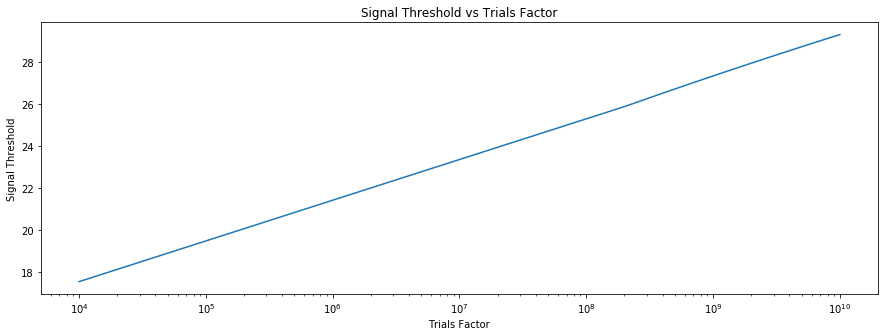

In [66]:
# 4.D: 
n = 1000000
new_prob = prob / n
scaled_signal3 = dist.ppf(1 - new_prob)
print(scaled_signal3)
print("1 mil trial factor: ", scaled_signal3 / signal)

n = 10000000
new_prob = prob / n
scaled_signal3 = dist.ppf(1 - new_prob)
print(scaled_signal3)
print("10 mil trial factor: ", scaled_signal3 / signal)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
n = np.linspace(1e4, 1e10)
thresholds = dist.ppf(1 - new_probs)
plt.semilogx(n, thresholds)
plt.title('Signal Threshold vs Trials Factor')
plt.xlabel('Trials Factor')
plt.ylabel('Signal Threshold');

Problem 4.D: If we increase the trial factor by many orders of magnitude, the sensitivity threshold doesn't change much. When calculating with 1 million and 10 million trials, the 10 million factor is only 20% brighter than the 1 million. When plotted you can see that the signal threshold and the trial factor have a log realtionship.